In [29]:
# Titanic Dataset

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
train.info()
print('++++++++++++++++++++++++++++++++++')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
++++++++++++++++++++++++++++++++++
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  41

In [33]:
# Feature engineering regarding names.
words = ["Mr.", "Mrs.", "Miss.", "Capt.","Col.", "Major.", "Jonkheer.", "Don.", 'Sir.', "Dr.", "Rev.", "the Countess.", "Dona", "Mme", "Mlle", "Ms",  "Master", "Lady"]
train['Name'] = [' '.join(w for w in t.split() if w in words) for t in train['Name']]
test['Name'] = [' '.join(w for w in t.split() if w in words) for t in test['Name']]

In [34]:
train['Name'][:5]

0      Mr.
1     Mrs.
2    Miss.
3     Mrs.
4      Mr.
Name: Name, dtype: object

In [35]:
Title_Dictionary = {
                        "Capt.":       "Officer",
                        "Col.":        "Officer",
                        "Major.":      "Officer",
                        "Jonkheer.":   "Royalty",
                        "Don.":        "Royalty",
                        "Sir." :       "Royalty",
                        "Dr.":         "Officer",
                        "Rev.":        "Officer",
                        "the Countess.":"Royalty",
                        "Dona.":       "Royalty",
                        "Mme.":        "Mrs",
                        "Mlle.":       "Miss",
                        "Ms.":         "Mrs",
                        "Mr." :        "Mr",
                        "Mrs." :       "Mrs",
                        "Miss." :      "Miss",
                        "Master." :    "Master",
                        "Lady." :      "Royalty"

                        }

In [36]:
newfeature= train['Name'].map(Title_Dictionary)
newfeature_test = test['Name'].map(Title_Dictionary)
newfeature.value_counts()

Mr         517
Miss       182
Mrs        125
Officer     18
Royalty      3
Name: Name, dtype: int64

<AxesSubplot:xlabel='Name', ylabel='Survived'>

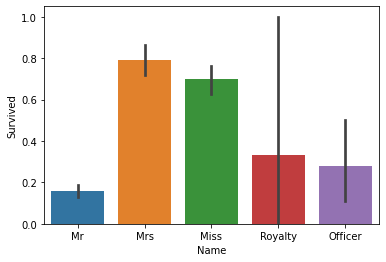

In [37]:
sns.barplot(x=newfeature, y ='Survived', data=train)

In [38]:
titles_dummy = pd.get_dummies(newfeature, prefix='Title')
train = pd.concat([train, titles_dummy], axis=1)
titles_dummy_test = pd.get_dummies(newfeature_test, prefix='Title')
test = pd.concat([test, titles_dummy_test], axis=1)
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,0,0


1    266
0    152
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

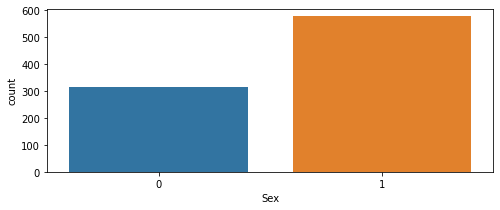

In [39]:
# Sex (label encoding) and plot
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1}).astype(int)
test['Sex'] = test['Sex'].map({'female': 0, 'male': 1}).astype(int)
test['Sex'].value_counts()
fig, axis1= plt.subplots(figsize=(8,3))
sns.countplot(x='Sex', data=train, ax=axis1)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

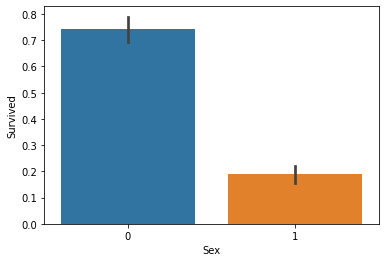

In [40]:
sns.barplot(x='Sex', y ='Survived', data=train)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

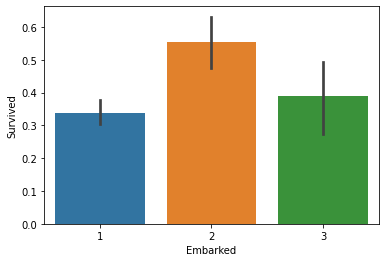

In [41]:
#Embarked

embark = train['Embarked'].fillna('S')
train['Embarked'] = embark.map({'S': 1, 'C': 2, 'Q': 3}).astype(int)
test['Embarked'] = embark.map({'S': 1, 'C': 2, 'Q': 3}).astype(int)
sns.barplot(x='Embarked', y ='Survived', data=train)

In [42]:
# Age
# handling with missing values
train['Age'] = train['Age'].fillna(train['Age'].median()).astype(int)
test['Age'] = test['Age'].fillna(train['Age'].median()).astype(int)

<AxesSubplot:>

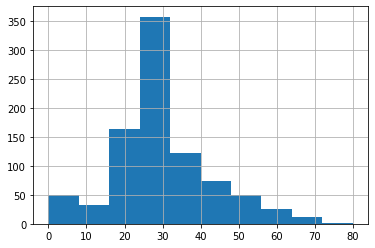

In [43]:
train['Age'].hist()

<AxesSubplot:xlabel='Age', ylabel='Survived'>

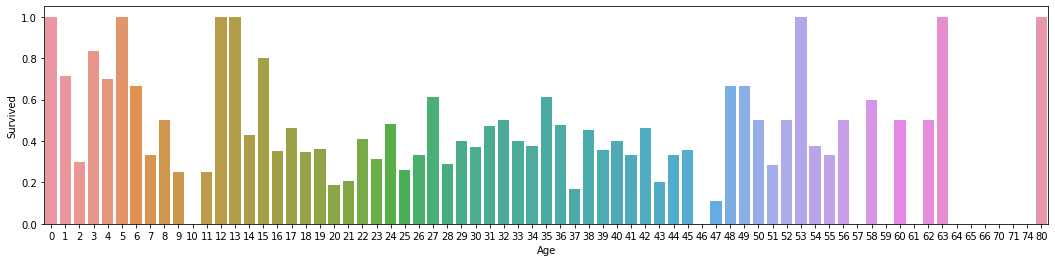

In [44]:
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
der_data = train[['Age', 'Survived']].groupby(['Age'], as_index = False).mean()
sns.barplot(x='Age', y ='Survived', data = der_data)

In [45]:
Embarked_dummy = pd.get_dummies(train['Embarked'], prefix= 'Embarked')
train = pd.concat([train, Embarked_dummy], axis= 1)
Embarked_dummy_test = pd.get_dummies(test['Embarked'], prefix= 'Embarked')
test = pd.concat([test, Embarked_dummy_test], axis= 1)
train.drop('Embarked', axis=1,inplace=True)
test.drop('Embarked', axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_1,Embarked_2,Embarked_3
0,1,0,3,1,22,1,0,A/5 21171,7.2500,NaN,0,1,0,0,0,1,0,0
1,2,1,1,0,38,1,0,PC 17599,71.2833,C85,0,0,1,0,0,0,1,0
2,3,1,3,0,26,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,0,1,0,0
3,4,1,1,0,35,1,0,113803,53.1000,C123,0,0,1,0,0,1,0,0
4,5,0,3,1,35,0,0,373450,8.0500,NaN,0,1,0,0,0,1,0,0


In [46]:
#lets replace Parch and SibSp with their sum
train['Relativesinship'] = train['SibSp'] + train['Parch']
test['Relativesinship'] = test['SibSp'] + test['Parch']
train[['Relativesinship', 'Survived']].groupby(['Relativesinship']).mean()

,Survived
Relativesinship,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [47]:
# only in test set fare feature has missing values
test['Fare'].fillna(test['Fare'].median(), inplace = True)

In [48]:
# converting floatings to integers
train['Fare'] = train['Fare'].astype(int)
test['Fare'] = test['Fare'].astype(int)

In [49]:
train.drop('Ticket',axis=1,inplace=True)
train.drop('Cabin',axis=1,inplace=True)

In [50]:
def age_cat(age):
    if age <= 16:
        return 0
    elif 16< age <=26:
        return 1
    elif 26< age <=36:
        return 2
    elif 36< age <=47:
        return 3
    elif 47 < age:
        return 4
    
train['Age'] = train['Age'].apply(age_cat)
test['Age'] = test['Age'].apply(age_cat)

In [51]:
Age_dummy = pd.get_dummies(train['Age'], prefix= 'Age')
train = pd.concat([train, Age_dummy], axis= 1)
Age_dummy_test = pd.get_dummies(test['Age'], prefix= 'Age')
test = pd.concat([test, Age_dummy_test], axis= 1)
train.drop('Age', axis=1, inplace=True)
test.drop('Age', axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Title_Miss,Title_Mr,Title_Mrs,...,Title_Royalty,Embarked_1,Embarked_2,Embarked_3,Relativesinship,Age_0,Age_1,Age_2,Age_3,Age_4
0,1,0,3,1,1,0,7,0,1,0,...,0,1,0,0,1,0,1,0,0,0
1,2,1,1,0,1,0,71,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,3,1,3,0,0,0,7,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,4,1,1,0,1,0,53,0,0,1,...,0,1,0,0,1,0,0,1,0,0
4,5,0,3,1,0,0,8,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [52]:
# defining predictor and target values for machine learning models
X_train = train[['Pclass','Sex', 'Age_0','Age_1','Age_2', 'Age_3', 'Age_4', 'Relativesinship', 'Fare','Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Embarked_1', 'Embarked_2', 'Embarked_3']]
y_train = train[['Survived']]
X_test = test[['Pclass','Sex', 'Age_0', 'Age_1', 'Age_2', 'Age_3', 'Age_4', 'Relativesinship', 'Fare','Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Embarked_1', 'Embarked_2', 'Embarked_3']]

columns = ['Pclass','Sex', 'Age_0','Age_1','Age_2', 'Age_3', 'Age_4', 'Relativesinship', 'Fare','Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Embarked_1', 'Embarked_2', 'Embarked_3']
X_train = X_train .reindex(columns= columns)
X_test = X_test.reindex(columns= columns)

X_train[columns] = X_train[columns].astype(int)
X_test[columns] = X_test[columns].astype(int)

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Pclass           891 non-null    int32
 1   Sex              891 non-null    int32
 2   Age_0            891 non-null    int32
 3   Age_1            891 non-null    int32
 4   Age_2            891 non-null    int32
 5   Age_3            891 non-null    int32
 6   Age_4            891 non-null    int32
 7   Relativesinship  891 non-null    int32
 8   Fare             891 non-null    int32
 9   Title_Miss       891 non-null    int32
 10  Title_Mr         891 non-null    int32
 11  Title_Mrs        891 non-null    int32
 12  Title_Officer    891 non-null    int32
 13  Embarked_1       891 non-null    int32
 14  Embarked_2       891 non-null    int32
 15  Embarked_3       891 non-null    int32
dtypes: int32(16)
memory usage: 55.8 KB


In [54]:
#Stochastic Gradient Descend classification
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train)
cross_clf_score = cross_val_score(sgd_clf, X_train, y_train, cv = 10, scoring = 'accuracy')
cross_clf_score.mean()

SGDClassifier(max_iter=5, random_state=42)

0.6430087390761549

In [55]:
# Confusion matrix
y_train_clf_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_clf_pred )

array([[412, 137],
       [130, 212]], dtype=int64)

In [56]:
#precision/recall score
print(precision_score(y_train, y_train_clf_pred ))
print(recall_score(y_train, y_train_clf_pred ))

0.6074498567335244
0.6198830409356725


In [57]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
cross_forest_score = cross_val_score(forest_clf, X_train, y_train, cv = 10, scoring = 'accuracy')
cross_forest_score.mean()

RandomForestClassifier(random_state=42)

0.8148564294631712

In [58]:
#precision/recall score
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train, cv = 3)
print('precision_score',precision_score(y_train, y_train_pred_forest))
print('recall_score',recall_score(y_train, y_train_pred_forest))

precision_score 0.7507788161993769
recall_score 0.7046783625730995


In [59]:
# K nearest classification
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
cross_knn_score = cross_val_score(knn_clf, X_train, y_train, cv = 10, scoring = 'accuracy')
cross_knn_score.mean()

KNeighborsClassifier()

0.7800998751560548

In [60]:
#precision/recall score of Survived
y_train_pred_knn = cross_val_predict(knn_clf, X_train, y_train, cv = 3)
print('precision_score',precision_score(y_train, y_train_pred_knn))
print('recall_score',recall_score(y_train, y_train_pred_knn))

precision_score 0.7198697068403909
recall_score 0.6461988304093568


In [61]:
# Support vector machine classsification
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(X_train, y_train)
cross_svc_score = cross_val_score(svc_clf, X_train, y_train, cv = 10, scoring = 'accuracy')
cross_svc_score.mean()

SVC()

0.6701248439450687

In [62]:
#precision/recall score
svc_clf_pred_train = cross_val_predict(svc_clf, X_train, y_train, cv = 3)
print('precision_score',precision_score(y_train, svc_clf_pred_train ))
print('recall_score',recall_score(y_train, svc_clf_pred_train ))

precision_score 0.6616541353383458
recall_score 0.2573099415204678


In [63]:
y_test_pred = svc_clf.predict(X_test)

svc_clf.score(X_train, y_train)

0.6857463524130191

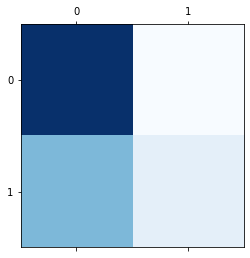

In [64]:
#Plot confusion matrix
conf_mx = confusion_matrix(y_train, svc_clf_pred_train )
plt.matshow(conf_mx, cmap=plt.cm.Blues)

In [65]:
mysubmission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_test_pred
    })
mysubmission.to_csv('titanic.csv', index=False)